In [1]:
import numpy as np
import matplotlib.pyplot as plt
from bias_variance import bias_variance_curves
from ridge_utils import ridge_mse_heatmap

# --- 1) Bias-Variance Trade-off ---
x = np.linspace(0, 1, 400)
bias2, variance, noise, total = bias_variance_curves(x)

plt.plot(x, bias2, label="Bias$^2$")
plt.plot(x, variance, label="Variance")
plt.plot(x, noise, "--", label="Noise")
plt.plot(x, total, linewidth=2, label="Total error")
plt.xlabel("Model complexity →")
plt.ylabel("Expected error")
plt.legend()
plt.title("Bias–Variance Trade-off")
plt.savefig("BVT.jpg")
plt.close()

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

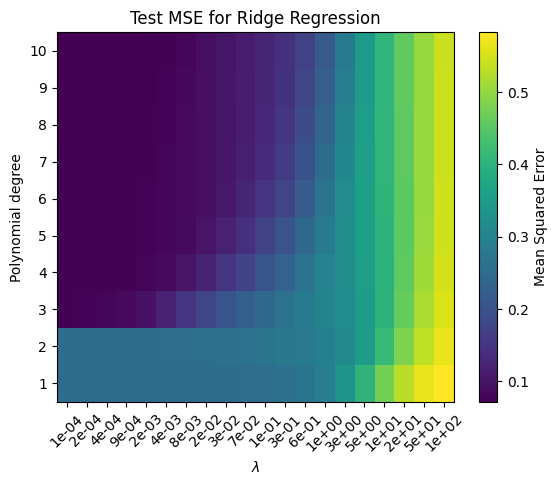

In [2]:
# --- 2) Ridge Regression MSE Heatmap ---
np.random.seed(42)
n_samples = 50
X = np.linspace(0, 1, n_samples)[:, None]
y = np.sin(2*np.pi*X).ravel() + 0.3*np.random.randn(n_samples)

degrees = np.arange(1, 11)
lambdas = np.logspace(-4, 2, 20)
mse = ridge_mse_heatmap(degrees, lambdas, X, y, seed=42)

plt.imshow(mse, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label="Mean Squared Error")
plt.xticks(range(len(lambdas)), [f"{l:.0e}" for l in lambdas], rotation=45)
plt.yticks(range(len(degrees)), degrees)
plt.xlabel(r"$\lambda$")
plt.ylabel("Polynomial degree")
plt.title("Test MSE for Ridge Regression")
plt.savefig("MSE_Ridge.jpg")
plt.close